In [1]:
!pip3 install scikit-allel

In [2]:
import pysam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.5


In [3]:
beagle_root = "/Users/lilybhattacharjee/Documents/beagle/"
shuffle_nans_input_root = beagle_root + "shuffle_nans_inputs/"
shuffle_nans_output_root = beagle_root + "shuffle_nans_outputs/"
no_shuffle_nans_input_root = beagle_root + "no_shuffle_nans_inputs/"
no_shuffle_nans_output_root = beagle_root + "no_shuffle_nans_outputs/"

# switch error folder (to original, shuffle)
se_original_shuffle = '{}/switch_error_results_original/'.format(shuffle_nans_output_root)
# switch error folder (to original, no shuffle)
se_original_no_shuffle = '{}/switch_error_results_original/'.format(no_shuffle_nans_output_root)

# switch error folder (to masked 0, shuffle)
se_masked0_shuffle = '{}/switch_error_results_masked_0/'.format(shuffle_nans_output_root)
# switch error folder (to masked 0, no shuffle)
se_masked0_no_shuffle = '{}/switch_error_results_masked_0/'.format(shuffle_nans_output_root)

## Hamming Error Rate

The number of individual cells where the input and output VCF files differ / The total number of cells

In [50]:
na_counts = ['0', '2', '5', '10', '20', '30', '50', '80', '100', '200', '300', '500', 'all_masked']

### Shuffled NAs (compare to original)

In [51]:
shuffled_na_files = [f for f in listdir(se_original_shuffle) if isfile(join(se_original_shuffle, f))]
shuffled_na_files

['switch_error_results.txt',
 '50_v_original.log',
 '10_v_original.diff.switch',
 '500_v_original.diff.indv.switch',
 '0_v_original.diff.switch',
 '10_v_original.diff.indv.switch',
 '20_v_original.diff.indv.switch',
 '200_v_original.log',
 '500_v_original.diff.switch',
 '50_v_original.diff.switch',
 '2_v_original.log',
 '100_v_original.diff.switch',
 '200_v_original.diff.indv.switch',
 '5_v_original.log',
 '20_v_original.log',
 '5_v_original.diff.indv.switch',
 'all_masked_v_original.log',
 '5_v_original.diff.switch',
 '0_v_original.diff.indv.switch',
 '0_v_original.log',
 '30_v_original.log',
 '2_v_original.diff.switch',
 '300_v_original.diff.indv.switch',
 '300_v_original.log',
 '20_v_original.diff.switch',
 '10_v_original.log',
 '80_v_original.diff.indv.switch',
 '200_v_original.diff.switch',
 '50_v_original.diff.indv.switch',
 '30_v_original.diff.switch',
 'all_masked_v_original.diff.indv.switch',
 '500_v_original.log',
 'all_masked_v_original.diff.switch',
 '30_v_original.diff.ind

In [52]:
total_num_cells = 27530 * 588
total_diff = 0

for i in na_counts:
    diff_switch_filename = '{}/{}_v_original.diff.indv.switch'.format(se_original_shuffle, i)
    diff_switch_file = pd.read_csv(diff_switch_filename, sep = '\t')
    print(diff_switch_file.head())
#     diff_switch_file['POS_START'] = pd.to_numeric(diff_switch_file['POS_START'])
#     diff_switch_file['POS_END'] = pd.to_numeric(diff_switch_file['POS_END'])
#     diff_switch_file['POS_LEN'] = diff_switch_file['POS_END'] - diff_switch_file['POS_START']
#     print(diff_switch_file)
#     print(diff_switch_file['POS_LEN'].sum())
    break

          INDV  N_COMMON_PHASED_HET  N_SWITCH    SWITCH
0    Organism0                10603       109  0.010280
1    Organism1                10646       103  0.009675
2   Organism10                 9182       129  0.014049
3  Organism100                 9336        91  0.009747
4  Organism101                 3968        62  0.015625


In [53]:
316822 * 43463

13770034586

In [54]:
dir(vcf_in)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [56]:
vcf_in = allel.read_vcf('/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/original/1_outputs/phased_genotypes.vcf')
gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())

In [57]:
for i in range(588):
    gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
gt = gt[['Organism{}'.format(i) for i in range(1, 589)]]
gt.head()

,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,Organism9,Organism10,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,0/1,1/1,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,0/1,1/0,...,0/0,1/0,0/1,1/0,0/1,0/0,0/1,0/0,0/0,0/0
4,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,1/0,1/1,...,1/1,0/1,1/1,1/1,1/0,1/1,1/0,1/1,1/1,1/1


In [58]:
def generate_gt_df(root_path, mode = 'original', num = 1):
    filename = '{}/{}/{}_outputs/phased_genotypes.vcf'.format(root_path, mode, num)
    vcf_in = allel.read_vcf(filename)
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    gt = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return gt

In [60]:
original_gt_df = generate_gt_df(no_shuffle_nans_output_root, mode = 'original', num = 1)
print('parsed original')
gt_dfs = {'all_masked': generate_gt_df(no_shuffle_nans_output_root, mode = 'all_masked', num = 1)}
print('parsed all masked')

masked_nas = ['2', '5', '10', '20', '30', '50', '80', '100', '200', '300', '500', '0']

count = 0
for i in range(len(masked_nas)):
    mode = 'masked'
    num = i + 1
    gt_dfs['{}/{}'.format(mode, masked_nas[i])] = generate_gt_df(no_shuffle_nans_output_root, mode = mode, num = num)
    
gt_dfs['masked/2'].head()

parsed original
parsed all masked


,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,Organism9,Organism10,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,0/1,1/1,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,0/1,1/0,...,0/0,1/0,0/1,1/0,1/0,0/0,0/1,0/0,0/0,0/0
4,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,1/0,1/1,...,1/1,0/1,1/1,1/1,0/1,1/1,1/0,1/1,1/1,1/1


In [63]:
filename = '{}output_dfs/original.csv'.format(no_shuffle_nans_output_root)
original_gt_df.to_csv(filename)

for k, v in gt_dfs.items():
    k = '_'.join(k.split('/'))
    filename = '{}output_dfs/{}.csv'.format(no_shuffle_nans_output_root, k)
    v.to_csv(filename)
    print(filename)

/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/all_masked.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_2.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_5.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_10.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_20.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_30.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_50.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_80.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_100.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_200.csv
/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/output_dfs/masked_300.c

In [ ]:
gt_dfs.keys()

In [64]:
all_masked = pd.read_csv('{}/output_dfs/{}.csv'.format(no_shuffle_nans_output_root, 'all_masked')).drop(columns = ['Unnamed: 0'])
all_masked.head()

,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,Organism9,Organism10,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,0/1,1/1,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,0/1,1/0,...,0/0,0/1,0/1,1/0,0/1,0/0,0/1,0/0,0/0,0/0
4,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,1/0,1/1,...,1/1,1/0,1/1,1/1,1/0,1/1,1/0,1/1,1/1,1/1


In [65]:
original = pd.read_csv('{}/output_dfs/{}.csv'.format(no_shuffle_nans_output_root, 'original')).drop(columns = ['Unnamed: 0'])
original.head()

,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,Organism9,Organism10,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,0/1,1/1,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,0/1,1/0,...,0/0,0/1,0/1,1/0,0/1,0/0,0/1,0/0,0/0,0/0
4,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,1/0,1/1,...,1/1,1/0,1/1,1/1,1/0,1/1,1/0,1/1,1/1,1/1


In [ ]:
all_masked

In [ ]:
# sum(pd.isnull(masked_0[masked_0 == original_gt_df]).sum()) / (masked_0.shape[0] * masked_0.shape[1])

sum((all_masked != pd.read_csv('{}/output_dfs/{}.csv'.format(no_shuffle_nans_output_root, 'original')).drop(columns = ['Unnamed: 0'])).sum())

In [ ]:
pd.isnull(original_gt_df).sum()

In [ ]:
masked_0.shape[0] , masked_0.shape[1]

In [66]:
def calculate_hamming_error(mode, compare = 'original'):
    print(compare)
    if compare == 'original':
        print('source of truth', 'original')
        source_of_truth = pd.read_csv('{}/output_dfs/original.csv'.format(mode)).drop(columns = ['Unnamed: 0'])
    else:
        print('source of truth', 'masked_0')
        source_of_truth = pd.read_csv('{}/output_dfs/masked_0.csv'.format(mode)).drop(columns = ['Unnamed: 0'])
    
    num_masked = ['0', '2', '5', '10', '20', '30', '50', '80', '100', '200', '300', '500']
    subfiles = ['masked_' + i for i in num_masked] + ['all_masked']
    all_he = []
    for i in subfiles:
        curr_masked = pd.read_csv('{}/output_dfs/{}.csv'.format(mode, i)).drop(columns = ['Unnamed: 0'])
        num_diff_cells = sum((curr_masked != source_of_truth).sum())
        curr_he = he = num_diff_cells / (curr_masked.shape[0] * curr_masked.shape[1])
        all_he.append(curr_he)
        print('processed', i, curr_he)
    return num_masked + ['all_masked'], all_he

# nas not shuffled, compare to original
no_shuffle_original_num_masked, no_shuffle_original_all_he = calculate_hamming_error(no_shuffle_nans_output_root, compare = 'original')

original
source of truth original
processed masked_0 0.08874900850278361
processed masked_2 0.08583258584945057
processed masked_5 0.08678541158562952
processed masked_10 0.08542542334768996
processed masked_20 0.08719319184266515
processed masked_30 0.08621034320012058
processed masked_50 0.08694769589637526
processed masked_80 0.08764594468372165
processed masked_100 0.08861538803679844
processed masked_200 0.08682976641437541
processed masked_300 0.08770055425003274
processed masked_500 0.08800819637698887
processed all_masked 0.08778234504844437


In [ ]:
# nas not shuffled, compare to masked_0
no_shuffle_masked0_num_masked, no_shuffle_masked0_all_he = calculate_hamming_error(no_shuffle_nans_output_root, compare = 'masked_0')


In [67]:
# nas shuffled, compare to original
shuffle_original_num_masked, shuffle_original_all_he = calculate_hamming_error(shuffle_nans_output_root, compare = 'original')

original
source of truth original


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs//output_dfs/original.csv'

In [146]:
# nas shuffled, compare to masked_0
shuffle_masked0_num_masked, shuffle_masked0_all_he = calculate_hamming_error(shuffle_nans_output_root, compare = 'masked_0')


masked_0
source of truth masked_0
processed masked_0 0.0
processed masked_2 0.07909429663619898
processed masked_5 0.08003779426772525
processed masked_10 0.08131463264564816
processed masked_20 0.07705632198393342
processed masked_30 0.07684319641405418
processed masked_50 0.07586751373269976
processed masked_80 0.07569614841941136
processed masked_100 0.07328331986626833
processed masked_200 0.07329295684855854
processed masked_300 0.0710656402045017
processed masked_500 0.0691504135253811
processed all_masked 0.08872269212806808


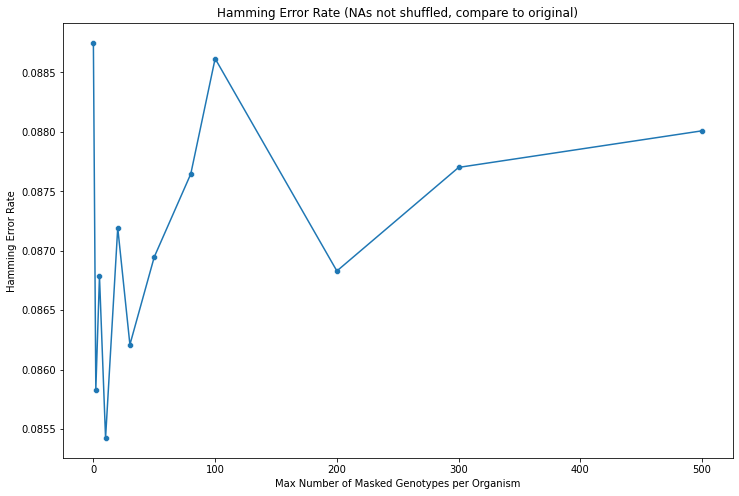

In [68]:
# nas not shuffled, compare to original
plt.figure(figsize = (12, 8))
sns.lineplot(x = [int(i) for i in no_shuffle_original_num_masked[:-1]], y = no_shuffle_original_all_he[:-1])
sns.scatterplot(x = [int(i) for i in no_shuffle_original_num_masked[:-1]], y = no_shuffle_original_all_he[:-1])
# sns.lineplot(x = [int(i) for i in shuffle_original_num_masked[:-1]], y = shuffle_original_all_he[:-1])
# sns.scatterplot(x = [int(i) for i in shuffle_original_num_masked[:-1]], y = shuffle_original_all_he[:-1])
plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Hamming Error Rate')
plt.title('Hamming Error Rate (NAs not shuffled, compare to original)')
plt.show()

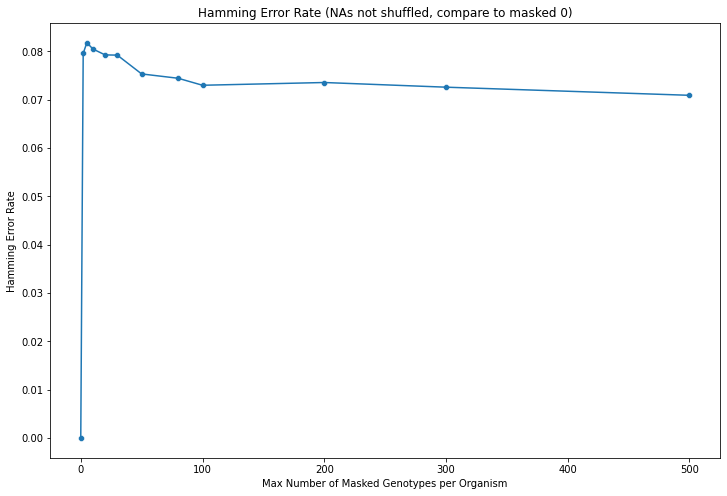

In [142]:
# nas not shuffled, compare to masked_0
plt.figure(figsize = (12, 8))
sns.lineplot(x = [int(i) for i in no_shuffle_masked0_num_masked[:-1]], y = no_shuffle_masked0_all_he[:-1])
sns.scatterplot(x = [int(i) for i in no_shuffle_masked0_num_masked[:-1]], y = no_shuffle_masked0_all_he[:-1])
plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Hamming Error Rate')
plt.title('Hamming Error Rate (NAs not shuffled, compare to masked 0)')
plt.show()

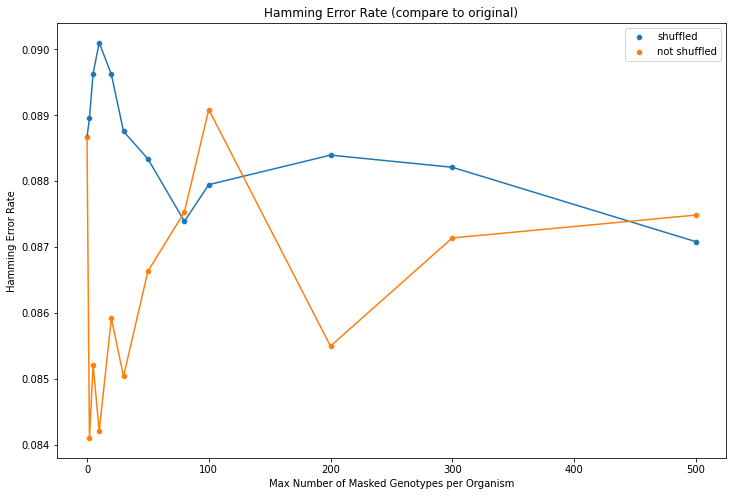

In [153]:
# nas not shuffled, compare to original
plt.figure(figsize = (12, 8))
sns.lineplot(x = [int(i) for i in shuffle_original_num_masked[:-1]], y = shuffle_original_all_he[:-1])
sns.scatterplot(x = [int(i) for i in shuffle_original_num_masked[:-1]], y = shuffle_original_all_he[:-1], label = 'shuffled')
sns.lineplot(x = [int(i) for i in no_shuffle_original_num_masked[:-1]], y = no_shuffle_original_all_he[:-1])
sns.scatterplot(x = [int(i) for i in no_shuffle_original_num_masked[:-1]], y = no_shuffle_original_all_he[:-1], label = 'not shuffled')
plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Hamming Error Rate')
plt.title('Hamming Error Rate (compare to original)')
plt.legend()
plt.show()

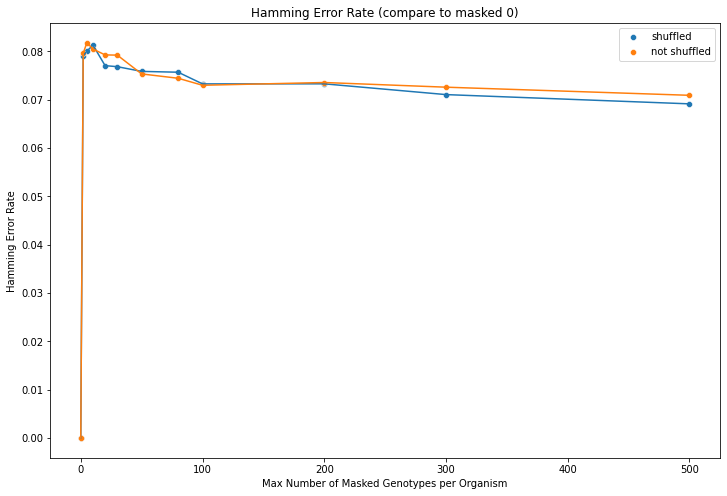

In [154]:
# nas shuffled, compare to masked_0
plt.figure(figsize = (12, 8))
sns.lineplot(x = [int(i) for i in shuffle_masked0_num_masked[:-1]], y = shuffle_masked0_all_he[:-1])
sns.scatterplot(x = [int(i) for i in shuffle_masked0_num_masked[:-1]], y = shuffle_masked0_all_he[:-1], label = 'shuffled')
sns.lineplot(x = [int(i) for i in no_shuffle_masked0_num_masked[:-1]], y = no_shuffle_masked0_all_he[:-1])
sns.scatterplot(x = [int(i) for i in no_shuffle_masked0_num_masked[:-1]], y = no_shuffle_masked0_all_he[:-1], label = 'not shuffled')
plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Hamming Error Rate')
plt.title('Hamming Error Rate (compare to masked 0)')
plt.legend()
plt.show()

## Number of Switch Errors

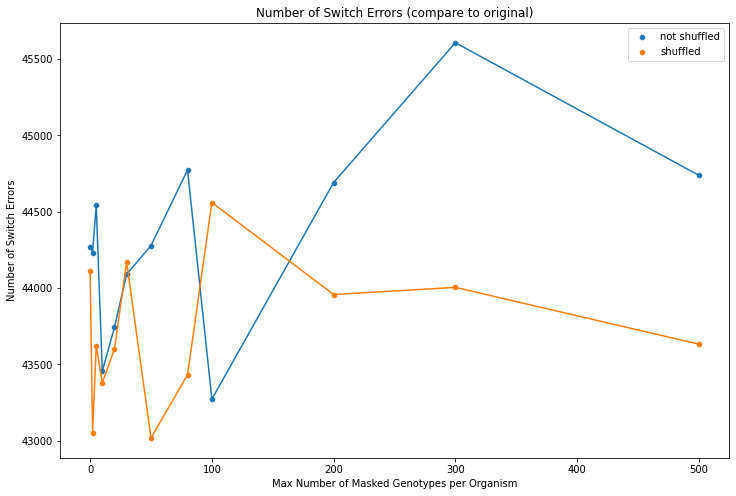

In [4]:
# no shuffle / shuffle, compare to original
plt.figure(figsize = (12, 8))
se_orig_no_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/switch_error_results_original/switch_error_results.txt', sep = '\t')
num_nas_ns = [int(i) for i in se_orig_no_shuffle['num_nas_per_organism'][1:]]
num_se_ns = [int(i) for i in se_orig_no_shuffle['num_switch_errors'][1:]]

se_orig_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/switch_error_results_original/switch_error_results.txt', sep = '\t')
num_nas_s = [int(i) for i in se_orig_shuffle['num_nas_per_organism'][1:]]
num_se_s = [int(i) for i in se_orig_shuffle['num_switch_errors'][1:]]

sns.lineplot(x = num_nas_ns, y = num_se_ns)
sns.scatterplot(x = num_nas_ns, y = num_se_ns, label = 'not shuffled')
sns.lineplot(x = num_nas_s, y = num_se_s)
sns.scatterplot(x = num_nas_s, y = num_se_s, label = 'shuffled')

plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Number of Switch Errors')
plt.title('Number of Switch Errors (compare to original)')
plt.legend()
plt.show()

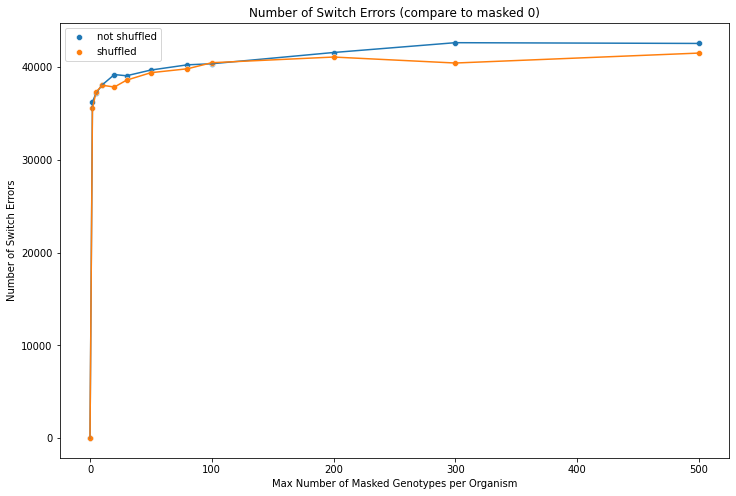

In [165]:
# no shuffle / shuffle, compare to masked_0
plt.figure(figsize = (12, 8))
se_orig_no_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/switch_error_results_masked_0/switch_error_results.txt', sep = '\t')
num_nas_ns = [int(i) for i in se_orig_no_shuffle['num_nas_per_organism'][1:]]
num_se_ns = [int(i) for i in se_orig_no_shuffle['num_switch_errors'][1:]]

se_orig_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/switch_error_results_masked_0/switch_error_results.txt', sep = '\t')
num_nas_s = [int(i) for i in se_orig_shuffle['num_nas_per_organism'][1:]]
num_se_s = [int(i) for i in se_orig_shuffle['num_switch_errors'][1:]]

sns.lineplot(x = num_nas_ns, y = num_se_ns)
sns.scatterplot(x = num_nas_ns, y = num_se_ns, label = 'not shuffled')
sns.lineplot(x = num_nas_s, y = num_se_s)
sns.scatterplot(x = num_nas_s, y = num_se_s, label = 'shuffled')

plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Number of Switch Errors')
plt.title('Number of Switch Errors (compare to masked 0)')
plt.legend()
plt.show()

## Switch Error Rate (SER)

number of switch errors / number of opportunities for switch errors (or number of informative markers i.e. heterozygous)

number of switch errors / number of heterozygous markers

ratio of number of switch errors / total number of SNP pairs for which the phase was estimated. does not include sites for which imputation was required

In [5]:
filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
vcf_in = allel.read_vcf(filename)
gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
for i in range(588):
    gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
original_unphased.head()

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,Organism9,Organism10,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,0/0,0/1,1/1,0/1,1/1,0/0,0/1,0/1,0/1,1/1,...,1/1,0/1,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/0
1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,0/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,0/1,...,1/1,1/1,0/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,0/0,0/1,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/1,...,0/0,0/1,0/1,0/1,0/1,0/0,0/1,0/0,0/0,0/0
4,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,0/1,1/1,...,1/1,0/1,1/1,1/1,0/1,1/1,0/1,1/1,1/1,1/1


In [13]:
num_hets = []
filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/all_masked/{}_inputs/cleaned_genotypes.vcf'.format(1)
vcf_in = allel.read_vcf(filename)
gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
for i in range(588):
    gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
num_het = sum(((original_unphased == '0/1') | (original_unphased == '1/0')).sum())
print('all_masked', num_het)
num_hets.append(num_het)

for h in range(1, 13):
    filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/masked/{}_inputs/cleaned_genotypes.vcf'.format(h)
    vcf_in = allel.read_vcf(filename)
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    num_het = sum(((original_unphased == '0/1') | (original_unphased == '1/0')).sum())
    print(h, num_het)
    num_hets.append(num_het)


all_masked 5259370
1 5334546
2 5331291
3 5338733
4 5355587
5 5360031
6 5366518
7 5370781
8 5372945
9 5375129
10 5376243
11 5376891
12 5377318


In [14]:
se_orig_no_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/switch_error_results_original/switch_error_results.txt', sep = '\t')
# se_orig_no_shuffle['num_switch_errors'] = se_orig_no_shuffle['num_switch_errors'][1:].astype('int')
# se_orig_no_shuffle['num_nas_per_organism'] = se_orig_no_shuffle['num_nas_per_organism'][1:].astype('int')

se_orig_no_shuffle['SER'] = se_orig_no_shuffle['num_switch_errors'] / num_het
se_orig_no_shuffle

,num_nas_per_organism,num_nas_input,num_switch_errors,SER
0,all_masked,327074,43684,0.008124
1,500,114859,43633,0.008114
2,300,128560,44005,0.008183
3,200,105461,43958,0.008175
4,100,58602,44561,0.008287
5,80,46882,43433,0.008077
6,50,29302,43018,0.008000
7,30,17611,44170,0.008214
8,20,11760,43601,0.008108
9,10,5880,43379,0.008067


In [15]:
num_hets = []
filename = '/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_inputs/all_masked/{}_inputs/cleaned_genotypes.vcf'.format(1)
vcf_in = allel.read_vcf(filename)
gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
for i in range(588):
    gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
num_het = sum(((original_unphased == '0/1') | (original_unphased == '1/0')).sum())
print('all_masked', num_het)
num_hets.append(num_het)

for h in range(1, 13):
    filename = '/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_inputs/masked/{}_inputs/cleaned_genotypes.vcf'.format(h)
    vcf_in = allel.read_vcf(filename)
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    num_het = sum(((original_unphased == '0/1') | (original_unphased == '1/0')).sum())
    print(h, num_het)
    num_hets.append(num_het)

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


all_masked 5259370
1 5334373
2 5331251
3 5338732
4 5355531
5 5359913
6 5366392
7 5370642
8 5372752
9 5374988
10 5376094
11 5376711
12 5377145


In [16]:
se_orig_shuffle = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/switch_error_results_original/switch_error_results.txt', sep = '\t')
# se_orig_no_shuffle['num_switch_errors'] = se_orig_no_shuffle['num_switch_errors'][1:].astype('int')
# se_orig_no_shuffle['num_nas_per_organism'] = se_orig_no_shuffle['num_nas_per_organism'][1:].astype('int')

se_orig_shuffle['SER'] = se_orig_shuffle['num_switch_errors'] / num_het
se_orig_shuffle

,num_nas_per_organism,num_nas_input,num_switch_errors,SER
0,all_masked,327074,44018,0.008186
1,500,114859,44739,0.008320
2,300,128560,45608,0.008482
3,200,105461,44692,0.008311
4,100,58602,43273,0.008048
5,80,46882,44774,0.008327
6,50,29302,44279,0.008235
7,30,17611,44091,0.008200
8,20,11760,43744,0.008135
9,10,5880,43456,0.008082


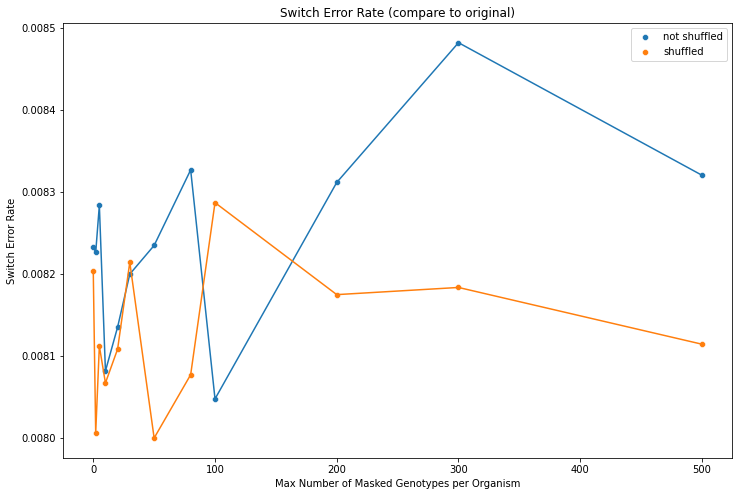

In [19]:
# no shuffle / shuffle, compare to original
plt.figure(figsize = (12, 8))

sns.lineplot(x = num_nas_ns, y = se_orig_shuffle['SER'][1:])
sns.scatterplot(x = num_nas_ns, y = se_orig_shuffle['SER'][1:], label = 'not shuffled')
sns.lineplot(x = num_nas_s, y = se_orig_no_shuffle['SER'][1:])
sns.scatterplot(x = num_nas_s, y = se_orig_no_shuffle['SER'][1:], label = 'shuffled')

plt.xlabel('Max Number of Masked Genotypes per Organism')
plt.ylabel('Switch Error Rate')
plt.title('Switch Error Rate (compare to original)')
plt.legend()
plt.show()

## Average Length of Correctly Phased Haplotype

QA haplotype block length = length of a segment between two successive switch errors * proportion of phased SNPs

In [191]:
filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/switch_error_results_masked_0/80_v_original.diff.switch'
pd.read_csv(filename, sep = '\t')

,CHROM,POS_START,POS_END,INDV
0,Fvb1-1,7488,324310,Organism107
1,Fvb1-1,7488,324310,Organism144
2,Fvb1-1,7488,324310,Organism148
3,Fvb1-1,7488,324310,Organism17
4,Fvb1-1,7488,324310,Organism18
...,...,...,...,...
39813,Fvb7-4,22741056,22751301,Organism18
39814,Fvb7-4,16531106,23527919,Organism299
39815,Fvb7-4,23036034,23531679,Organism134
39816,Fvb7-4,23036034,23531679,Organism214


In [194]:
# variants = allel.VariantChunkedTable(vcf_in[chrom]['variants'], 
#                                      names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'num_alleles'],
#                                      index='POS')
vcf_in['variants/CHROM']
vcf_in['variants/POS']


array([    7488,   142259,   205862, ..., 23431788, 23527919, 23531679],
      dtype=int32)

In [199]:
def open_vcf():
    filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    vcf_in = allel.read_vcf(filename)
    return vcf_in

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return original_unphased
    
def generate_variants_df(vcf_in):
    return pd.DataFrame({
        'CHROM': vcf_in['variants/CHROM'],
        'POS': vcf_in['variants/POS']
    })

genos = generate_genotypes_df(vcf_in)
variants = generate_variants_df(vcf_in)
df_concat = pd.concat([variants, genos], axis = 1)


In [200]:
df_concat.head()

,CHROM,POS,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,Fvb1-1,7488,0/0,0/1,1/1,0/1,1/1,0/0,0/1,0/1,...,1/1,0/1,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/0
1,Fvb1-1,142259,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,0/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,Fvb1-1,205862,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,0/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,Fvb1-1,324310,0/0,0/1,0/0,0/0,0/0,0/0,0/1,0/1,...,0/0,0/1,0/1,0/1,0/1,0/0,0/1,0/0,0/0,0/0
4,Fvb1-1,345046,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,...,1/1,0/1,1/1,1/1,0/1,1/1,0/1,1/1,1/1,1/1


In [217]:
ind1 = int(df_concat.loc[(df_concat['CHROM'] == 'Fvb7-4') & (df_concat['POS'] == 16531106)].index[0])
ind2 = int(df_concat.loc[(df_concat['CHROM'] == 'Fvb7-4') & (df_concat['POS'] == 23527919)].index[0])

print(ind1, ind2)

df_concat.iloc[pd.np.r_[ind1:ind2]]['Organism299']


27327 27528


/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


27327    1/1
27328    1/1
27329    1/1
27330    1/1
27331    1/1
        ... 
27523    0/1
27524    0/1
27525    1/1
27526    1/1
27527    0/1
Name: Organism299, Length: 201, dtype: object

In [34]:
# calculate average length of correctly phased haplotype
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

ind_to_num_masked = [500, 300, 200, 100, 80, 50, 30, 20, 10, 5, 2, 0]

def open_vcf(shuffled, mode, k):
    original_filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    original_vcf = allel.read_vcf(original_filename)
    
    curr_filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/{}/{}_outputs/phased_genotypes.vcf'.format(shuffled, mode, k)
    curr_vcf = allel.read_vcf(curr_filename)
    return original_vcf, curr_vcf

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return original_unphased
    
def generate_variants_df(vcf_in):
    return pd.DataFrame({
        'CHROM': vcf_in['variants/CHROM'],
        'POS': vcf_in['variants/POS']
    })

def calc_avg_length(shuffled = 'no_shuffle', mode = 'masked', compare_mode = 'original', k = 0):
    original_vcf, curr_vcf = open_vcf(shuffled, mode, k + 1)
    genos = generate_genotypes_df(curr_vcf)
    variants = generate_variants_df(original_vcf)
    df_concat = pd.concat([variants, genos], axis = 1)
    
    filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, compare_mode, ind_to_num_masked[k])
    switch_errors = pd.read_csv(filename, sep = '\t')
    
    avg_length = 0
    prev_end = 0
    prev_chrom = ''
    for i, row in switch_errors.iterrows():
        chrom = row['CHROM']
        start = row['POS_START']
        end = row['POS_END']
        org = row['INDV']
        try:
            if int(end) <= int(start):
                continue
            ind1 = int(df_concat.loc[(df_concat['CHROM'] == chrom) & (df_concat['POS'] == start)].index[0])
            ind2 = int(df_concat.loc[(df_concat['CHROM'] == chrom) & (df_concat['POS'] == end)].index[0])
            df_concat.loc[(ind1 <= df_concat.index) & (df_concat.index <= ind2), org] = '|'
        except:
            continue
        
    print('done editing switch errors')
    
    avg_len = 0
    for i in range(1, 589):
        org_name = 'Organism{}'.format(i)
        curr_org = df_concat[['POS', 'CHROM', org_name]]
        curr_len = 0
        curr_het = 0
        
        curr_start = 0
        prev_chrom = ''
        for j, row in curr_org.iterrows():
            elem = row[org_name]
            chrom = row['CHROM']
            pos = row['POS']
            
            if elem == '|':
                curr_start = pos
                continue
            
            if chrom != prev_chrom:
                curr_start = pos
                prev_chrom = chrom
            
            curr_len += 1
#         for j in range(len(curr_col)):
#             elem = curr_col[j]
#             ind = curr_col.index[j]
#             if 
#             if elem == '|':
#                 curr_len = ind - curr_start
                
#         curr_col = '-'.join(list(df_concat['Organism{}'.format(i)]))
#         sep_chunks = curr_col.split('|')
#         sep_chunks = [np.array(''.join(i).replace('|', '').split('-')) for i in sep_chunks]
#         sep_chunks = np.array([(np.count_nonzero(i == '0/1') + np.count_nonzero(i == '1/0')) / len(i) for i in sep_chunks])
#         sep_chunks = sep_chunks[np.where(sep_chunks != 0)]
#         avg = np.mean(sep_chunks)
#         print(sep_chunks)
        break

calc_avg_length(shuffled = 'no_shuffle', mode = 'masked', compare_mode = 'original', k = 0)
# def calc_all_avg_lengths():

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


done editing switch errors
[0.1975867269984917, 0.0, 0.0, 0.2185792349726776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 0.10869565217391304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2524271844660194, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [33]:
x = pd.DataFrame({
    'a': [0, 1, 2],
    'b': [0, 1, 1]
})
x.loc[(1 <= x.index) & (x.index <= 1), 'a'] = '|'
x.head()

,a,b
0,0,0
1,|,1
2,2,1


## Imputation Accuracy

In [41]:
def open_vcf(filename):
#     filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    vcf_in = allel.read_vcf(filename)
    return vcf_in

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    clean_gt = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return clean_gt


In [42]:
# among NAs from original dataset, what percent are imputed correctly?
# all_masked vs. original (source of truth), no shuffle

no_shuffle_original_filename = '/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/original/1_outputs/phased_genotypes.vcf'
no_shuffle_all_masked_filename = '/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/all_masked/1_outputs/phased_genotypes.vcf'

no_shuffle_og = generate_genotypes_df(open_vcf(no_shuffle_original_filename))
no_shuffle_am = generate_genotypes_df(open_vcf(no_shuffle_all_masked_filename))


In [43]:
no_shuffle_og_s = no_shuffle_og.sort_index(axis = 1)
no_shuffle_am_s = no_shuffle_am.sort_index(axis = 1)

In [29]:
no_shuffle_og_s.head()

,Organism1,Organism10,Organism100,Organism101,Organism102,Organism103,Organism104,Organism105,Organism106,Organism107,...,Organism90,Organism91,Organism92,Organism93,Organism94,Organism95,Organism96,Organism97,Organism98,Organism99
0,0/0,1/1,1/1,1/0,0/1,1/1,1/1,1/1,0/1,1/1,...,0/0,0/1,1/0,1/1,0/0,1/0,0/0,1/1,0/1,1/1
1,1/1,0/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,0/1,...,1/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,1/0,1/1
2,1/1,0/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,0/1,...,1/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,1/0,1/1
3,0/0,1/0,1/0,1/0,0/0,0/0,0/0,0/0,0/1,1/0,...,0/1,0/1,1/0,0/0,0/0,1/0,1/0,0/1,0/1,0/1
4,1/1,1/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/0,1/0,1/1,1/1,1/1,0/1,0/1,1/1,1/1,1/0


In [30]:
no_shuffle_am_s.head()

,Organism1,Organism10,Organism100,Organism101,Organism102,Organism103,Organism104,Organism105,Organism106,Organism107,...,Organism90,Organism91,Organism92,Organism93,Organism94,Organism95,Organism96,Organism97,Organism98,Organism99
0,0/0,1/1,1/1,1/0,0/1,1/1,1/1,1/1,0/1,1/1,...,0/0,0/1,0/1,1/1,0/0,0/1,0/0,1/1,0/1,1/1
1,1/1,0/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,0/1,...,1/1,1/1,1/0,1/1,1/1,1/1,1/1,1/0,1/0,1/1
2,1/1,0/1,1/1,0/1,1/1,1/1,1/1,1/1,1/0,0/1,...,1/1,1/1,1/0,1/1,1/1,1/1,1/1,1/0,1/0,1/1
3,0/0,1/0,1/0,1/0,0/0,0/0,0/0,0/0,0/1,1/0,...,0/1,1/0,0/1,0/0,0/0,1/0,1/0,0/1,0/1,0/1
4,1/1,1/1,0/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/0,0/1,1/1,1/1,1/1,0/1,0/1,1/1,1/1,1/0


In [31]:
sum((no_shuffle_og_s != no_shuffle_am_s).sum())

1420989

In [44]:
no_shuffle_na_locs = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_inputs/na_locs.csv')
no_shuffle_na_locs.head()

,row,col
0,190,1
1,499,1
2,511,1
3,571,1
4,727,1


In [45]:
t_hom_p_hom = 0
t_hom_p_het = 0
t_het_p_het = 0
t_het_p_hom = 0

t_01_p_01 = 0
t_01_p_10 = 0
t_10_p_10 = 0
t_10_p_01 = 0

def is_hom(elem):
    return(elem == '0/0' or elem == '1/1')

def is_het(elem):
    return(elem == '0/1' or elem == '1/0')

for i, row in no_shuffle_na_locs.iterrows():
    r, c = int(row['row']), int(row['col'])
    true = no_shuffle_og_s.iloc[r - 1, c - 1]
    pred = no_shuffle_am_s.iloc[r - 1, c - 1]
    
    if is_hom(true) and is_hom(pred):
        t_hom_p_hom += 1
    elif is_hom(true) and is_het(pred):
        t_hom_p_het += 1
    elif is_het(true) and is_het(pred):
        t_het_p_het += 1
    else:
        t_het_p_hom += 1
        
    if is_het(true) and is_het(pred):
        if true == '0/1' and pred == '0/1':
            t_01_p_01 += 1
        elif true == '0/1' and pred == '1/0':
            t_01_p_10 += 1
        elif true == '1/0' and pred == '1/0':
            t_10_p_10 += 1
        else:
            t_10_p_01 += 1

print(t_hom_p_hom, t_hom_p_het, t_het_p_het, t_het_p_hom)
print(t_01_p_01, t_01_p_10, t_10_p_10, t_10_p_01)

210710 0 116364 0
42481 15661 42211 16011


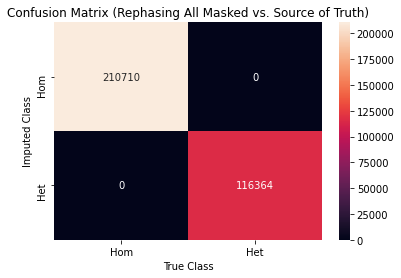

In [46]:
import numpy as np
ax = plt.subplot()
cf_matrix = np.array([
    [t_hom_p_hom, t_het_p_hom],
    [t_hom_p_het, t_het_p_het]
])
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g')
ax.set_title('Confusion Matrix (Rephasing All Masked vs. Source of Truth)')
ax.set_xlabel('True Class')
ax.set_ylabel('Imputed Class')
ax.xaxis.set_ticklabels(['Hom', 'Het'])   
ax.yaxis.set_ticklabels(['Hom', 'Het'])
plt.show()

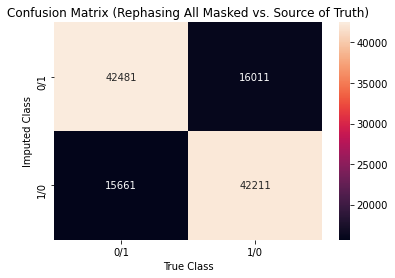

In [47]:
ax = plt.subplot()
cf_matrix = np.array([
    [t_01_p_01, t_10_p_01],
    [t_01_p_10, t_10_p_10]
])
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g')
ax.set_title('Confusion Matrix (Rephasing All Masked vs. Source of Truth)')
ax.set_xlabel('True Class')
ax.set_ylabel('Imputed Class')
ax.xaxis.set_ticklabels(['0/1', '1/0'])   
ax.yaxis.set_ticklabels(['0/1', '1/0'])
plt.show()

211651 307 114816 300
41430 16102 41210 16074


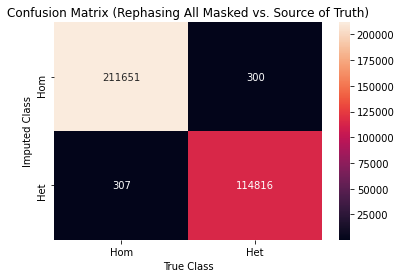

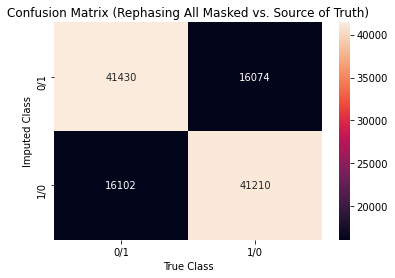

In [70]:
# all_masked vs. original (source of truth), shuffle

shuffle_original_filename = '/Users/lilybhattacharjee/Documents/beagle/no_shuffle_nans_outputs/original/1_outputs/phased_genotypes.vcf'
shuffle_all_masked_filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_outputs/all_masked/1_outputs/phased_genotypes.vcf'

shuffle_og = generate_genotypes_df(open_vcf(shuffle_original_filename))
shuffle_am = generate_genotypes_df(open_vcf(shuffle_all_masked_filename))

shuffle_og_s = shuffle_og.sort_index(axis = 1)
shuffle_am_s = shuffle_am.sort_index(axis = 1)

shuffle_na_locs = pd.read_csv('/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/mod_na_locs.csv')

t_hom_p_hom = 0
t_hom_p_het = 0
t_het_p_het = 0
t_het_p_hom = 0

t_01_p_01 = 0
t_01_p_10 = 0
t_10_p_10 = 0
t_10_p_01 = 0

def is_hom(elem):
    return(elem == '0/0' or elem == '1/1')

def is_het(elem):
    return(elem == '0/1' or elem == '1/0')

for i, row in shuffle_na_locs.iterrows():
    r, c = int(row['row']), int(row['col'])
    true = shuffle_og_s.iloc[r - 1, c - 1]
    pred = shuffle_am_s.iloc[r - 1, c - 1]
    
    if is_hom(true) and is_hom(pred):
        t_hom_p_hom += 1
    elif is_hom(true) and is_het(pred):
        t_hom_p_het += 1
    elif is_het(true) and is_het(pred):
        t_het_p_het += 1
    else:
        t_het_p_hom += 1
        
    if is_het(true) and is_het(pred):
        if true == '0/1' and pred == '0/1':
            t_01_p_01 += 1
        elif true == '0/1' and pred == '1/0':
            t_01_p_10 += 1
        elif true == '1/0' and pred == '1/0':
            t_10_p_10 += 1
        else:
            t_10_p_01 += 1

print(t_hom_p_hom, t_hom_p_het, t_het_p_het, t_het_p_hom)
print(t_01_p_01, t_01_p_10, t_10_p_10, t_10_p_01)

ax = plt.subplot()
cf_matrix = np.array([
    [t_hom_p_hom, t_het_p_hom],
    [t_hom_p_het, t_het_p_het]
])
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g')
ax.set_title('Confusion Matrix (Rephasing All Masked vs. Source of Truth)')
ax.set_xlabel('True Class')
ax.set_ylabel('Imputed Class')
ax.xaxis.set_ticklabels(['Hom', 'Het'])   
ax.yaxis.set_ticklabels(['Hom', 'Het'])
plt.show()

ax = plt.subplot()
cf_matrix = np.array([
    [t_01_p_01, t_10_p_01],
    [t_01_p_10, t_10_p_10]
])
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g')
ax.set_title('Confusion Matrix (Rephasing All Masked vs. Source of Truth)')
ax.set_xlabel('True Class')
ax.set_ylabel('Imputed Class')
ax.xaxis.set_ticklabels(['0/1', '1/0'])   
ax.yaxis.set_ticklabels(['0/1', '1/0'])
plt.show()

In [ ]:
# calculate average length of correctly phased haplotype
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

ind_to_num_masked = [500, 300, 200, 100, 80, 50, 30, 20, 10, 5, 2, 0]

def open_vcf(shuffled, mode, k):
    original_filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    original_vcf = allel.read_vcf(original_filename)
    
    curr_filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/{}/{}_outputs/phased_genotypes.vcf'.format(shuffled, mode, k)
    curr_vcf = allel.read_vcf(curr_filename)
    return original_vcf, curr_vcf

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return original_unphased
    
def generate_variants_df(vcf_in):
    return pd.DataFrame({
        'CHROM': vcf_in['variants/CHROM'],
        'POS': vcf_in['variants/POS']
    })

def calc_avg_length(shuffled = 'no_shuffle', mode = 'masked', compare_mode = 'original', k = 0):
    original_vcf, curr_vcf = open_vcf(shuffled, mode, k + 1)
    genos = generate_genotypes_df(curr_vcf)
    variants = generate_variants_df(original_vcf)
    df_concat = pd.concat([variants, genos], axis = 1)
    
    filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, compare_mode, ind_to_num_masked[k])
    switch_errors = pd.read_csv(filename, sep = '\t')
    
    avg_length = 0
    prev_end = 0
    prev_chrom = ''
    for i, row in switch_errors.iterrows():
        chrom = row['CHROM']
        start = row['POS_START']
        end = row['POS_END']
        org = row['INDV']
        try:
            if int(end) <= int(start):
                continue
            ind1 = int(df_concat.loc[(df_concat['CHROM'] == chrom) & (df_concat['POS'] == start)].index[0])
            ind2 = int(df_concat.loc[(df_concat['CHROM'] == chrom) & (df_concat['POS'] == end)].index[0])
            df_concat.loc[(ind1 <= df_concat.index) & (df_concat.index <= ind2), org] = '|'
        except:
            continue
        
    print('done editing switch errors')
    
    avg_len = 0
    for i in range(1, 589):
        org_name = 'Organism{}'.format(i)
        curr_org = df_concat[['POS', 'CHROM', org_name]]
        curr_len = 0
        curr_het = 0
        
        curr_start = 0
        prev_chrom = ''
        for j, row in curr_org.iterrows():
            elem = row[org_name]
            chrom = row['CHROM']
            pos = row['POS']
            
            if elem == '|':
                curr_start = pos
                continue
            
            if chrom != prev_chrom:
                curr_start = pos
                prev_chrom = chrom
            
            curr_len += 1
#         for j in range(len(curr_col)):
#             elem = curr_col[j]
#             ind = curr_col.index[j]
#             if 
#             if elem == '|':
#                 curr_len = ind - curr_start
                
#         curr_col = '-'.join(list(df_concat['Organism{}'.format(i)]))
#         sep_chunks = curr_col.split('|')
#         sep_chunks = [np.array(''.join(i).replace('|', '').split('-')) for i in sep_chunks]
#         sep_chunks = np.array([(np.count_nonzero(i == '0/1') + np.count_nonzero(i == '1/0')) / len(i) for i in sep_chunks])
#         sep_chunks = sep_chunks[np.where(sep_chunks != 0)]
#         avg = np.mean(sep_chunks)
#         print(sep_chunks)
        break

calc_avg_length(shuffled = 'no_shuffle', mode = 'masked', compare_mode = 'original', k = 0)
# def calc_all_avg_lengths():

In [66]:
def open_vcf(shuffled, mode, k):
    original_filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    original_vcf = allel.read_vcf(original_filename)
    
    curr_filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/{}/{}_outputs/phased_genotypes.vcf'.format(shuffled, mode, k)
    curr_vcf = allel.read_vcf(curr_filename)
    return original_vcf, curr_vcf

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return original_unphased
    
def generate_variants_df(vcf_in):
    return pd.DataFrame({
        'CHROM': vcf_in['variants/CHROM'],
        'POS': vcf_in['variants/POS']
    })

k = '1'
shuffled = 'shuffle'
mode = 'all_masked'
original_vcf, curr_vcf = open_vcf(shuffled, mode, k)
genos = generate_genotypes_df(curr_vcf)
variants = generate_variants_df(original_vcf)
df_concat = pd.concat([variants, genos], axis = 1)

filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, 'original', 'all_masked')
switch_errors = pd.read_csv(filename, sep = '\t')


/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


In [67]:
df_concat.head()

,CHROM,POS,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,Fvb1-1,7488,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,Fvb1-1,142259,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,Fvb1-1,205862,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,Fvb1-1,324310,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,...,0/0,1/0,0/1,1/0,0/1,0/0,0/1,0/0,0/0,0/0
4,Fvb1-1,345046,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,...,1/1,0/1,1/1,1/1,1/0,1/1,1/0,1/1,1/1,1/1


In [70]:
switch_errors = switch_errors.loc[switch_errors['POS_END'] >= switch_errors['POS_START']]
switch_errors.head()

,CHROM,POS_START,POS_END,INDV
0,Fvb1-1,7488,324310,Organism107
1,Fvb1-1,7488,324310,Organism22
2,Fvb1-1,7488,324310,Organism29
3,Fvb1-1,7488,324310,Organism30
4,Fvb1-1,7488,324310,Organism362


In [71]:
switch_errors.loc[switch_errors.CHROM == 'Fvb1-1']

,CHROM,POS_START,POS_END,INDV
0,Fvb1-1,7488,324310,Organism107
1,Fvb1-1,7488,324310,Organism22
2,Fvb1-1,7488,324310,Organism29
3,Fvb1-1,7488,324310,Organism30
4,Fvb1-1,7488,324310,Organism362
...,...,...,...,...
860,Fvb1-1,27345082,27389034,Organism581
861,Fvb1-1,27345082,27389034,Organism586
862,Fvb1-1,24895243,27389034,Organism80
863,Fvb1-1,27345082,27389034,Organism97


In [72]:
df_concat.loc[df_concat.CHROM == 'Fvb1-1']

,CHROM,POS,Organism1,Organism2,Organism3,Organism4,Organism5,Organism6,Organism7,Organism8,...,Organism579,Organism580,Organism581,Organism582,Organism583,Organism584,Organism585,Organism586,Organism587,Organism588
0,Fvb1-1,7488,0/0,0/1,1/1,0/1,1/1,0/0,0/1,1/0,...,1/1,1/0,0/1,1/0,0/0,0/0,0/0,0/1,1/1,0/0
1,Fvb1-1,142259,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
2,Fvb1-1,205862,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
3,Fvb1-1,324310,0/0,1/0,0/0,0/0,0/0,0/0,1/0,1/0,...,0/0,1/0,0/1,1/0,0/1,0/0,0/1,0/0,0/0,0/0
4,Fvb1-1,345046,1/1,0/1,1/1,1/1,1/1,1/1,0/1,0/1,...,1/1,0/1,1/1,1/1,1/0,1/1,1/0,1/1,1/1,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Fvb1-1,27389034,1/0,0/1,1/1,0/1,1/1,0/1,1/0,0/1,...,1/1,1/1,0/1,1/0,1/1,0/1,1/1,0/1,1/1,1/1
896,Fvb1-1,27412497,1/0,1/1,0/1,1/1,1/1,0/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
897,Fvb1-1,27518759,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/0,0/1,1/1,1/1,1/1,1/1,1/1,1/1
898,Fvb1-1,27552415,0/1,0/0,1/0,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [73]:
df_concat.loc[df_concat.CHROM == 'Fvb1-1'].POS

0          7488
1        142259
2        205862
3        324310
4        345046
         ...   
895    27389034
896    27412497
897    27518759
898    27552415
899    27576690
Name: POS, Length: 900, dtype: int32

In [23]:
def open_vcf(shuffled, mode, k):
    original_filename = '/Users/lilybhattacharjee/Documents/beagle/shuffle_nans_inputs/original/1_inputs/cleaned_genotypes.vcf'
    original_vcf = allel.read_vcf(original_filename)
    
    curr_filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/{}/{}_outputs/phased_genotypes.vcf'.format(shuffled, mode, k)
    curr_vcf = allel.read_vcf(curr_filename)
    return original_vcf, curr_vcf

def generate_genotypes_df(vcf_in):
    gt = pd.DataFrame(allel.GenotypeArray(vcf_in['calldata/GT']).to_haplotypes())
    for i in range(588):
        gt['Organism{}'.format(i + 1)] = gt[2 * i].astype(str) + '/' + gt[2 * i + 1].astype(str)
    original_unphased = gt[['Organism{}'.format(i) for i in range(1, 589)]]
    return original_unphased
    
def generate_variants_df(vcf_in):
    return pd.DataFrame({
        'CHROM': vcf_in['variants/CHROM'],
        'POS': vcf_in['variants/POS']
    })

In [24]:
k = '1'
shuffled = 'shuffle'
mode = 'all_masked'
original_vcf, curr_vcf = open_vcf(shuffled, mode, k)
genos = generate_genotypes_df(curr_vcf)
variants = generate_variants_df(original_vcf)
df_concat = pd.concat([variants, genos], axis = 1)

filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, 'original', 'all_masked')
switch_errors = pd.read_csv(filename, sep = '\t')

total_avg = 0
num_chunks = 0

for chrom in pd.unique(df_concat.CHROM):
    chrom_se = switch_errors.loc[switch_errors.CHROM == chrom]
    chrom_genos = df_concat.loc[df_concat.CHROM == chrom]
    chrom_pos = df_concat.loc[df_concat.CHROM == chrom].POS
    for org in range(1, 589):
        e = chrom_se[chrom_se.INDV == 'Organism{}'.format(org)].sort_values('POS_START')
        prev_end = 0

        for i, row in e.iterrows():
            start = row['POS_START']
            end = row['POS_END']

            chunk_before = chrom_genos.loc[(prev_end < chrom_genos['POS']) & (chrom_genos['POS'] < start)]['Organism{}'.format(org)]
            if len(chunk_before) == 0:
                continue
            avg_len = ((chunk_before == '0/1').sum() + (chunk_before == '1/0').sum()) / (len(chunk_before)) * (start - prev_end)
            total_avg += avg_len

            prev_end = end
            num_chunks += 1

        last_chunk = chrom_genos.loc[chrom_genos['POS'] > prev_end]['Organism{}'.format(org)]
        if len(last_chunk) > 0:
            avg_len = ((last_chunk == '0/1').sum() + (last_chunk == '1/0').sum()) / (len(last_chunk)) * (list(chrom_genos.POS)[-1] - prev_end)
            total_avg += avg_len
            num_chunks += 1
    print('processed chrom', chrom)
    
if num_chunks > 0:
    print(total_avg / num_chunks)

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


processed chrom Fvb1-1
processed chrom Fvb1-2
processed chrom Fvb1-3
processed chrom Fvb1-4
processed chrom Fvb2-1
processed chrom Fvb2-2
processed chrom Fvb2-3
processed chrom Fvb2-4
processed chrom Fvb3-1
processed chrom Fvb3-2
processed chrom Fvb3-3
processed chrom Fvb3-4
processed chrom Fvb4-1
processed chrom Fvb4-2
processed chrom Fvb4-3
processed chrom Fvb4-4
processed chrom Fvb5-1
processed chrom Fvb5-2
processed chrom Fvb5-3
processed chrom Fvb5-4
processed chrom Fvb6-1
processed chrom Fvb6-2
processed chrom Fvb6-3
processed chrom Fvb6-4
processed chrom Fvb7-1
processed chrom Fvb7-2
processed chrom Fvb7-3
processed chrom Fvb7-4
4188570.638223406


## RUNNING

In [25]:
# not shuffled
k = '1'
shuffled = 'no_shuffle'
mode = 'all_masked'
original_vcf, curr_vcf = open_vcf(shuffled, mode, k)
genos = generate_genotypes_df(curr_vcf)
variants = generate_variants_df(original_vcf)
df_concat = pd.concat([variants, genos], axis = 1)

filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, 'original', 'all_masked')
switch_errors = pd.read_csv(filename, sep = '\t')

print(switch_errors.head())

total_avg = 0
num_chunks = 0

for chrom in pd.unique(df_concat.CHROM):
    chrom_se = switch_errors.loc[switch_errors.CHROM == chrom]
    chrom_genos = df_concat.loc[df_concat.CHROM == chrom]
    chrom_pos = df_concat.loc[df_concat.CHROM == chrom].POS
    for org in range(1, 589):
        e = chrom_se[chrom_se.INDV == 'Organism{}'.format(org)].sort_values('POS_START')
        prev_end = 0

        for i, row in e.iterrows():
            start = row['POS_START']
            end = row['POS_END']

            chunk_before = chrom_genos.loc[(prev_end < chrom_genos['POS']) & (chrom_genos['POS'] < start)]['Organism{}'.format(org)]
            if len(chunk_before) == 0:
                continue
            avg_len = ((chunk_before == '0/1').sum() + (chunk_before == '1/0').sum()) / (len(chunk_before)) * (start - prev_end)
            total_avg += avg_len

            prev_end = end
            num_chunks += 1

        last_chunk = chrom_genos.loc[chrom_genos['POS'] > prev_end]['Organism{}'.format(org)]
        if len(last_chunk) > 0:
            avg_len = ((last_chunk == '0/1').sum() + (last_chunk == '1/0').sum()) / (len(last_chunk)) * (list(chrom_genos.POS)[-1] - prev_end)
            total_avg += avg_len
            num_chunks += 1
    print('processed chrom', chrom)
    
if num_chunks > 0:
    print(total_avg / num_chunks)

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


    CHROM  POS_START  POS_END         INDV
0  Fvb1-1       7488   324310  Organism107
1  Fvb1-1       7488   324310  Organism119
2  Fvb1-1       7488   324310   Organism18
3  Fvb1-1       7488   324310  Organism183
4  Fvb1-1       7488   324310   Organism30
processed chrom Fvb1-1
processed chrom Fvb1-2
processed chrom Fvb1-3
processed chrom Fvb1-4
processed chrom Fvb2-1
processed chrom Fvb2-2
processed chrom Fvb2-3
processed chrom Fvb2-4
processed chrom Fvb3-1
processed chrom Fvb3-2
processed chrom Fvb3-3
processed chrom Fvb3-4
processed chrom Fvb4-1
processed chrom Fvb4-2
processed chrom Fvb4-3
processed chrom Fvb4-4
processed chrom Fvb5-1
processed chrom Fvb5-2
processed chrom Fvb5-3
processed chrom Fvb5-4
processed chrom Fvb6-1
processed chrom Fvb6-2
processed chrom Fvb6-3
processed chrom Fvb6-4
processed chrom Fvb7-1
processed chrom Fvb7-2
processed chrom Fvb7-3
processed chrom Fvb7-4
4158078.489427831


## SECOND RUNNING

In [ ]:
# original, shuffled
k = '1'
shuffled = 'shuffle'
mode = 'all_masked'
original_vcf, curr_vcf = open_vcf(shuffled, mode, k)
genos = generate_genotypes_df(curr_vcf)
variants = generate_variants_df(original_vcf)
df_concat = pd.concat([variants, genos], axis = 1)

filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, 'original', 'all_masked')
switch_errors = pd.read_csv(filename, sep = '\t')

print(switch_errors.head())

total_avg = 0
num_chunks = 0

for chrom in pd.unique(df_concat.CHROM):
    chrom_se = switch_errors.loc[switch_errors.CHROM == chrom]
    chrom_genos = df_concat.loc[df_concat.CHROM == chrom]
    chrom_pos = df_concat.loc[df_concat.CHROM == chrom].POS
    for org in range(1, 589):
        e = chrom_se[chrom_se.INDV == 'Organism{}'.format(org)].sort_values('POS_START')
        prev_end = 0

        for i, row in e.iterrows():
            start = row['POS_START']
            end = row['POS_END']

            chunk_before = chrom_genos.loc[(prev_end < chrom_genos['POS']) & (chrom_genos['POS'] < start)]['Organism{}'.format(org)]
            if len(chunk_before) == 0:
                continue
            avg_len = ((chunk_before == '0/1').sum() + (chunk_before == '1/0').sum()) / (len(chunk_before)) * (start - prev_end)
            total_avg += avg_len

            prev_end = end
            num_chunks += 1

        last_chunk = chrom_genos.loc[chrom_genos['POS'] > prev_end]['Organism{}'.format(org)]
        if len(last_chunk) > 0:
            avg_len = ((last_chunk == '0/1').sum() + (last_chunk == '1/0').sum()) / (len(last_chunk)) * (list(chrom_genos.POS)[-1] - prev_end)
            total_avg += avg_len
            num_chunks += 1
    print('processed chrom', chrom)
    
if num_chunks > 0:
    print(total_avg / num_chunks)

In [105]:
# masked_0, shuffled
k = '1'
shuffled = 'shuffle'
mode = 'all_masked'
original_vcf, curr_vcf = open_vcf(shuffled, mode, k)
genos = generate_genotypes_df(curr_vcf)
variants = generate_variants_df(original_vcf)
df_concat = pd.concat([variants, genos], axis = 1)

filename = '/Users/lilybhattacharjee/Documents/beagle/{}_nans_outputs/switch_error_results_{}/{}_v_original.diff.switch'.format(shuffled, 'masked_0', 'all_masked')
switch_errors = pd.read_csv(filename, sep = '\t')

print(switch_errors.head())

total_avg = 0
num_chunks = 0

for chrom in pd.unique(df_concat.CHROM):
    chrom_se = switch_errors.loc[switch_errors.CHROM == chrom]
    chrom_genos = df_concat.loc[df_concat.CHROM == chrom]
    chrom_pos = df_concat.loc[df_concat.CHROM == chrom].POS
    for org in range(1, 589):
        e = chrom_se[chrom_se.INDV == 'Organism{}'.format(org)].sort_values('POS_START')
        prev_end = 0

        for i, row in e.iterrows():
            start = row['POS_START']
            end = row['POS_END']

            chunk_before = chrom_genos.loc[(prev_end < chrom_genos['POS']) & (chrom_genos['POS'] < start)]['Organism{}'.format(org)]
            if len(chunk_before) == 0:
                continue
            avg_len = ((chunk_before == '0/1').sum() + (chunk_before == '1/0').sum()) / (len(chunk_before)) * (start - prev_end)
            total_avg += avg_len

            prev_end = end
            num_chunks += 1

        last_chunk = chrom_genos.loc[chrom_genos['POS'] > prev_end]['Organism{}'.format(org)]
        if len(last_chunk) > 0:
            avg_len = ((last_chunk == '0/1').sum() + (last_chunk == '1/0').sum()) / (len(last_chunk)) * (list(chrom_genos.POS)[-1] - prev_end)
            total_avg += avg_len
            num_chunks += 1
    print('processed chrom', chrom)
    
if num_chunks > 0:
    print(total_avg / num_chunks)

/Users/lilybhattacharjee/anaconda3/lib/python3.6/site-packages/allel/io/vcf_read.py:1721: UserWarning: invalid FILTER header: '##FILTER=<ID=PASS,Description=PASS>\n'
  warnings.warn('invalid FILTER header: %r' % header)


    CHROM  POS_START  POS_END         INDV
0  Fvb1-1       7488   324310  Organism107
1  Fvb1-1       7488   324310  Organism144
2  Fvb1-1       7488   324310   Organism22
3  Fvb1-1       7488   324310   Organism29
4  Fvb1-1       7488   324310   Organism30
processed chrom Fvb1-1
processed chrom Fvb1-2
processed chrom Fvb1-3
processed chrom Fvb1-4
processed chrom Fvb2-1
processed chrom Fvb2-2
processed chrom Fvb2-3
processed chrom Fvb2-4
processed chrom Fvb3-1
processed chrom Fvb3-2
processed chrom Fvb3-3
processed chrom Fvb3-4
processed chrom Fvb4-1
processed chrom Fvb4-2
processed chrom Fvb4-3
processed chrom Fvb4-4
processed chrom Fvb5-1
processed chrom Fvb5-2
processed chrom Fvb5-3
processed chrom Fvb5-4
processed chrom Fvb6-1
processed chrom Fvb6-2
processed chrom Fvb6-3
processed chrom Fvb6-4
processed chrom Fvb7-1
processed chrom Fvb7-2
processed chrom Fvb7-3
processed chrom Fvb7-4
4130545.8552318583
